## 1. Using the iris dataset

In [53]:
install.packages("corrplot")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [54]:
library(corrplot)

corrplot 0.84 loaded


In [57]:
head(iris, 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


## Finding correlation between the input variables and the output variable

Mapping the classes of the target variable to a numeric value to be able to perform correlation test between the variables

In [58]:
levels(factor(iris$Species))

[1] "setosa"     "versicolor" "virginica"

In [59]:
iris <- data.matrix(data.frame(unclass(iris)))
head(iris, 10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1
4.6,3.4,1.4,0.3,1
5.0,3.4,1.5,0.2,1
4.4,2.9,1.4,0.2,1
4.9,3.1,1.5,0.1,1


In [96]:
data <- iris[,c(1, 2, 3, 4, 5)]
res <- cor(data)
res
paste("Maximum correlation:", max(res[5,][res[5,] != 1]))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411,0.7825612
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259,-0.4266576
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654,0.9490347
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000,0.9565473
Species,0.7825612,-0.4266576,0.9490347,0.9565473,1.0000000


[1] "Maximum correlation: 0.956547332876403"

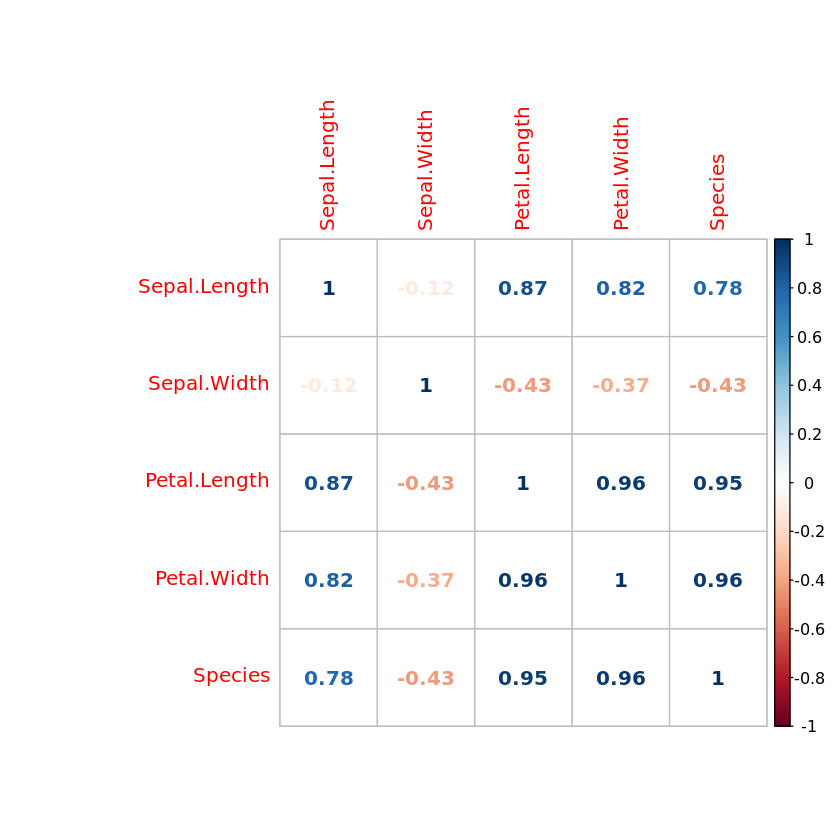

In [70]:
corrplot(res, method='number')

## 3. Discussing the highly correlated variable to the output variable

As we can see from above, the output variable *Species* is most correlated with the input parameter *Petal.Width*, with a value of 0.956(rounded up to 0.96 in the graph). This shows us that, in this data, the sepal width parameter is the most indicative of the species of the flower. Other highly correlated variables are *Petal.Length*(0.949) and *Sepal.Length*(0.782). We also observe that the variable *Sepal.Width* is negatively correlated with the output variable.

## 4. Linear regression between *Petal.Width* and *Species*

Here, we make a linear regression model of Species as a function of Petal.Width using the lm(Linear Model) function. Since the p-value is very low(<0.05), we can reject the null hypothesis. This means that the predictor's value is highly related to the changes in the response variable. 

The R square value is a measure of how close the data is to the fitted regression line. Since it has a high value(0.915), it also emphasises the strong linear relation between the varibles

In [103]:
iris <- data.frame(iris)

In [112]:
lr <- lm(Species ~ Petal.Width, data=iris)
summary(lr)


Call:
lm(formula = Species ~ Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61753 -0.13156  0.02739  0.13019  0.79370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.76700    0.03657   20.97   <2e-16 ***
Petal.Width  1.02807    0.02576   39.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2397 on 148 degrees of freedom
Multiple R-squared:  0.915,	Adjusted R-squared:  0.9144 
F-statistic:  1593 on 1 and 148 DF,  p-value: < 2.2e-16


The residual value in linear regression is the vertical distance between the data point and the regression line. Plotting the residuals, we can see that the points are scattered in a random pattern across the horizontal axis. This indicates that a linear model provides a viable fit to the data. A U-shaped or a similar pattern would have been suggestive of a non-linear model. We have also plotted the normal Q-Q plot, which will give a straight line if the errors are normally distributed

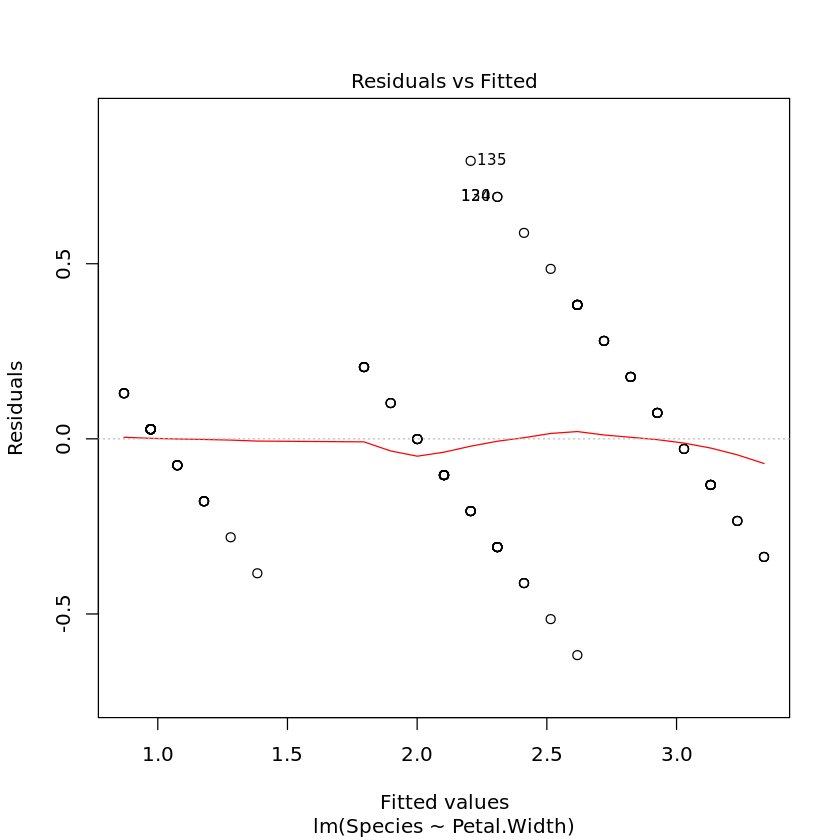

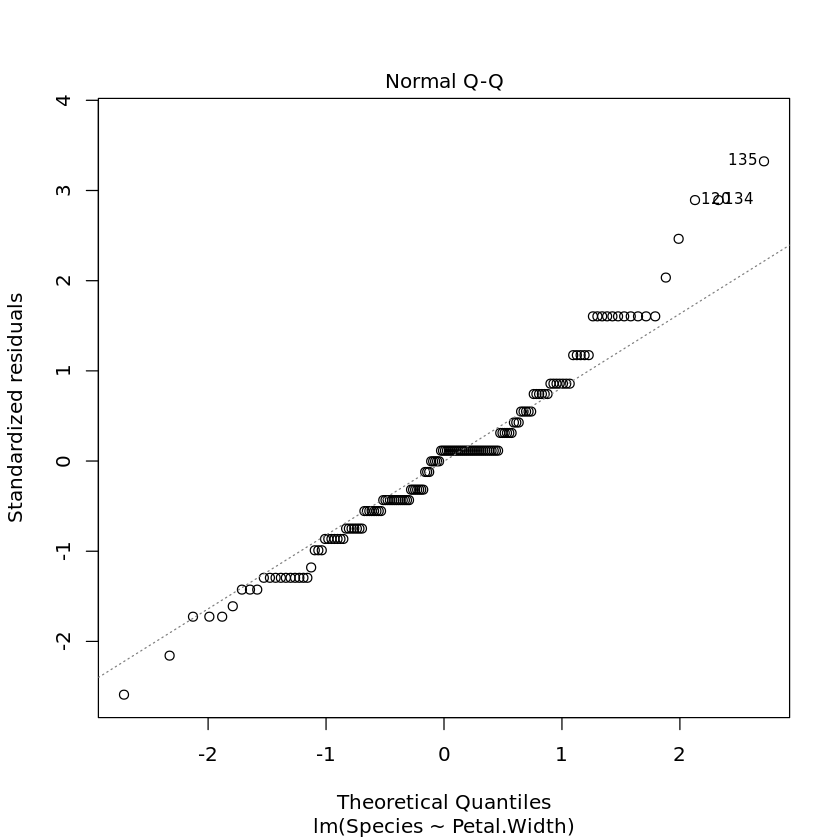

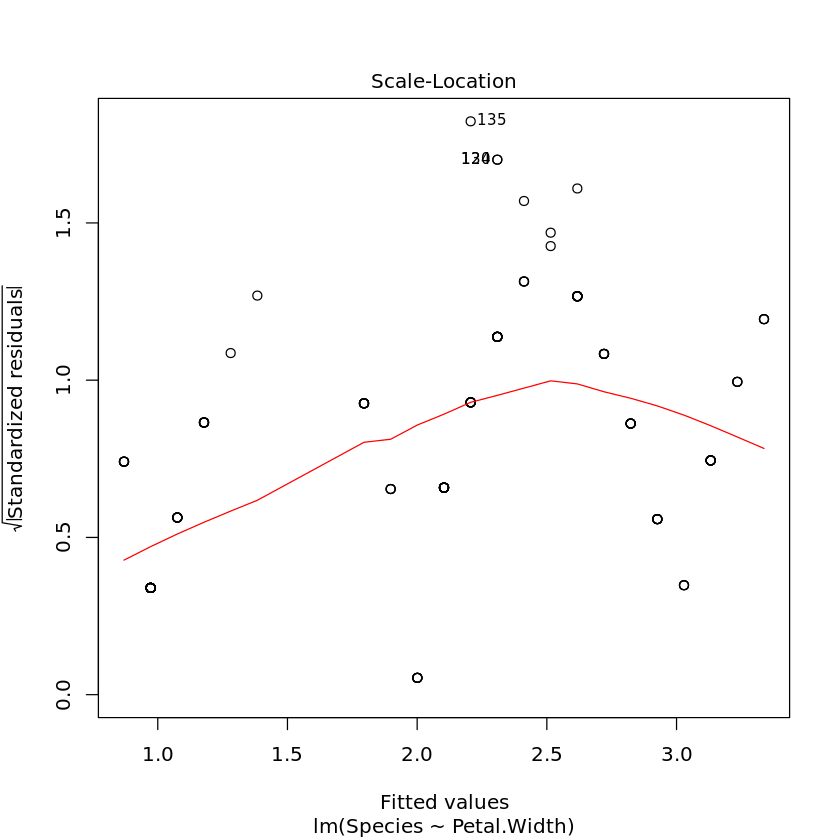

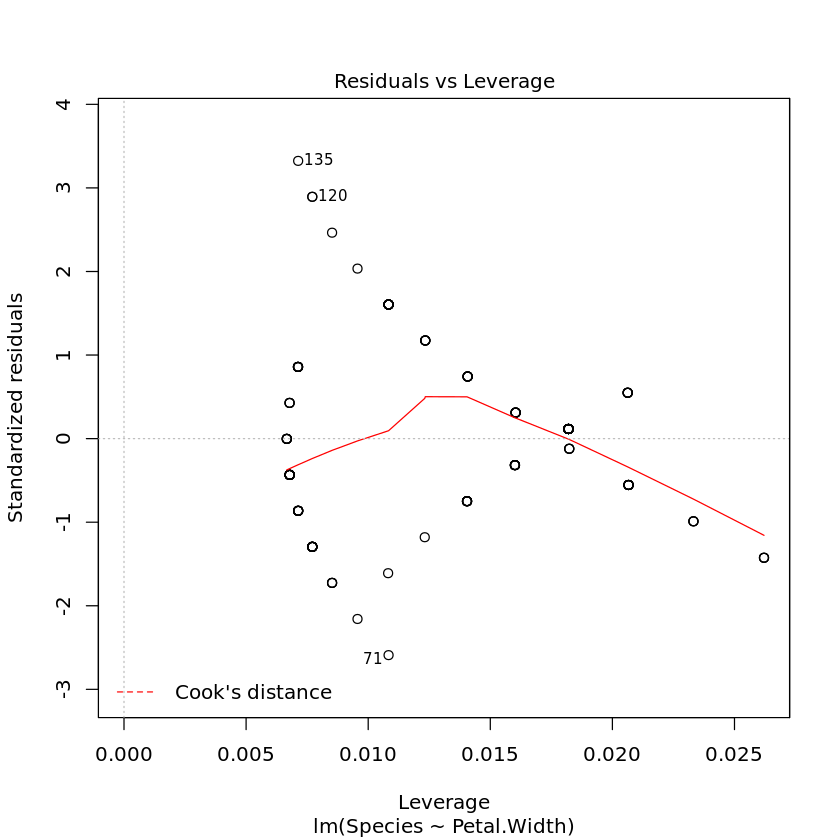

In [119]:
plot(lr)